In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("nc_clean.csv")
df = df.iloc[:,1:]
df.dropna(axis=0,inplace=True)

In [27]:
df.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
1,6850,1.0,jeep,good,6 cylinders,gas,155000.0,clean,manual,4wd,compact,SUV,blue
5,5400,1.0,honda,excellent,4 cylinders,gas,156000.0,clean,automatic,fwd,compact,coupe,blue
6,16000,1.0,jeep,excellent,6 cylinders,gas,98000.0,clean,automatic,4wd,mid-size,truck,red
13,11900,0.0,ford,excellent,6 cylinders,gas,247000.0,clean,automatic,4wd,full-size,pickup,silver
14,3990,1.0,lincoln,excellent,8 cylinders,gas,97000.0,clean,automatic,fwd,full-size,sedan,other


In [3]:
df = df[df['price'].between(999.99,99999)]
df = df[df['odometer']<899999]
df = df[df['year']>1990]

df.describe().apply(lambda s: s.apply(lambda x: format(x, '.2f')))

,price,year,odometer
count,2208.00,2208.00,2208.00
mean,11866.26,2009.02,131925.26
std,7896.68,5.81,62273.32
min,1950.00,1991.00,0.00
25%,5800.00,2006.00,90625.00
50%,8999.00,2010.00,130000.00
75%,16800.00,2014.00,168177.25
max,32999.00,2020.00,489000.00


/tmp/ipykernel_1828200/2797377244.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax0 = sns.heatmap(df.corr(),annot=True)


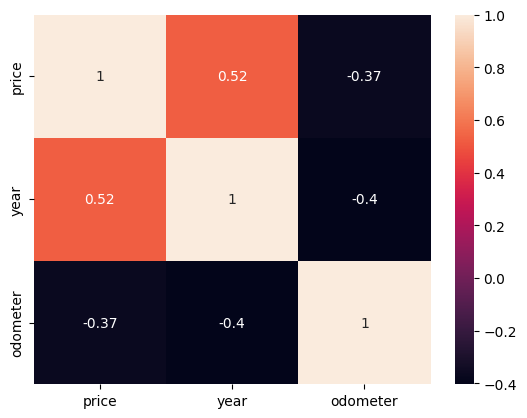

In [4]:
# Correlation Plot
import seaborn as sns
ax0 = sns.heatmap(df.corr(),annot=True)
ax0
ax0.get_figure().savefig('ax0.png')

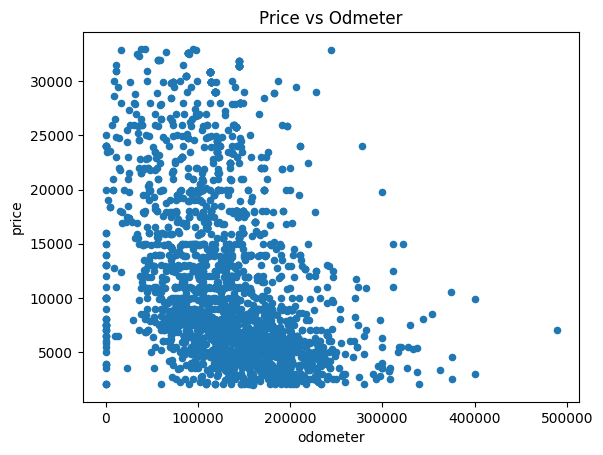

In [110]:
# Scatter Plot
ax1 = df.plot(kind='scatter',x='odometer',y='price')
ax1.set_title("Price vs Odmeter")
ax1.get_figure().savefig('ax1.png')

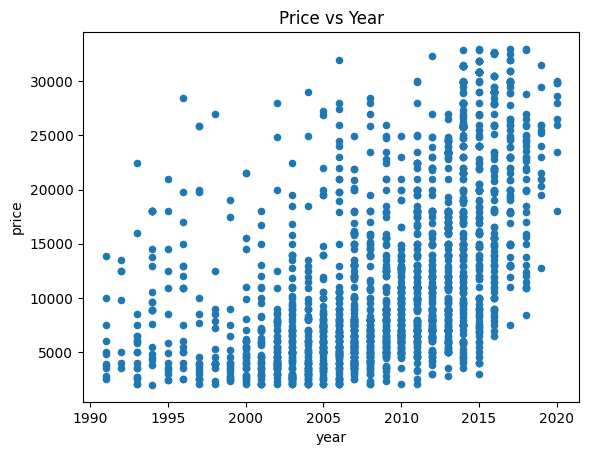

In [111]:
ax2 = df.plot(kind='scatter',x='year',y='price')
ax2.set_title("Price vs Year")
ax2.get_figure().savefig('ax2.png')

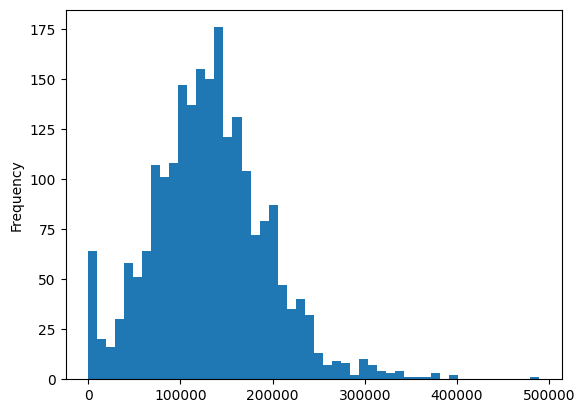

In [112]:
ax3 = df['odometer'].plot(kind='hist',bins=50)
ax3.set_title("")
ax3.get_figure().savefig('ax3.png')

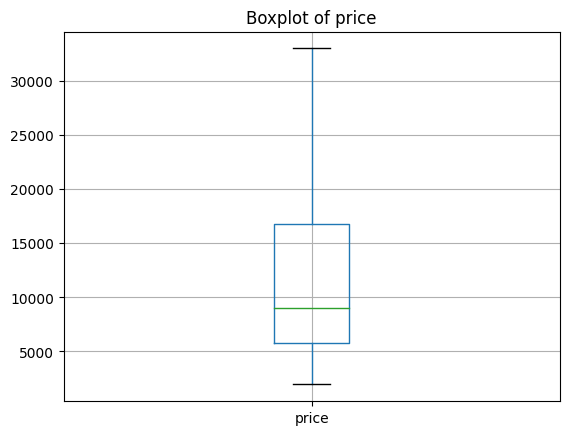

In [113]:
ax4 = df.boxplot('price')
ax4.set_title("Boxplot of price")
ax4.get_figure().savefig('ax4.png')

In [13]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    df = df.iloc[:,2:]
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (4 * nGraphPerRow, 6 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(int(nGraphRow), int(nGraphPerRow), i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.savefig('ax5.png')
    plt.show()

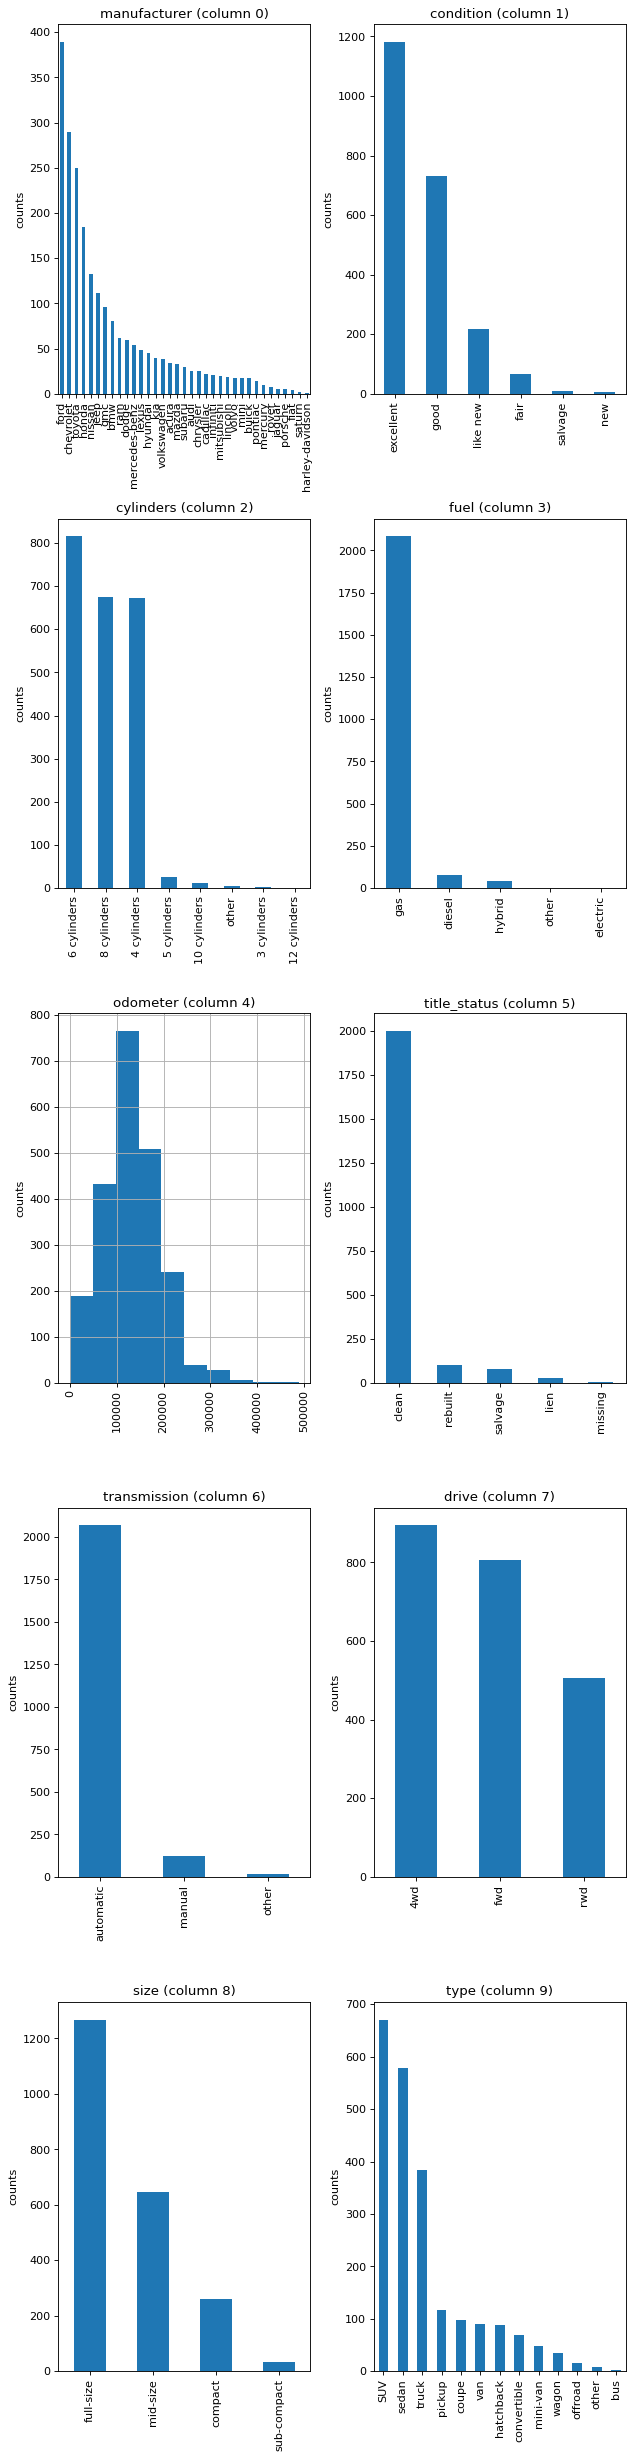

In [14]:
plotPerColumnDistribution(df, 10, 2)